In [96]:
import unimodal_model as um
import importlib as imp
from PIL import Image
import numpy as np
import pandas as pd
import os
from imblearn.over_sampling import RandomOverSampler
imp.reload(um)

<module 'unimodal_model' from '/gpfs/data/rsingh47/anair27/singh-lab-TCGA-project/multiomic-model-tcga/models/MAVI/unimodal_model.py'>

In [4]:
IMAGE = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data"
CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"

In [5]:
example_case = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data/TCGA-69-7978.jpeg"

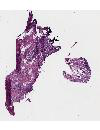

In [6]:
example_image = Image.open(example_case)
example_image

In [7]:
np.array(example_image).shape

(130, 100, 3)

In [8]:
import matplotlib.pyplot as plt

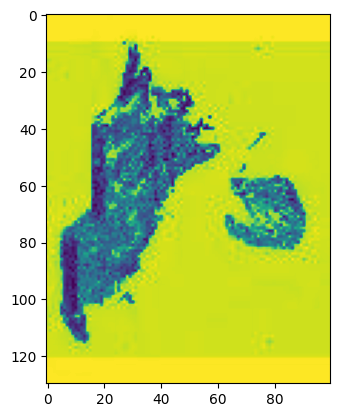

In [9]:
plt.imshow(np.array(example_image)[:,:,1])

In [63]:
training_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/training_cases.csv")["case_id"])
testing_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/testing_cases.csv")["case_id"])

In [71]:
len(training_cases)

389

In [65]:
image_size = np.array(example_image).shape

In [72]:
X_train = np.empty((len(training_cases),) + image_size, dtype='float32')
y_train = np.empty((len(training_cases),), dtype='int')
X_test = np.empty((len(testing_cases),) + image_size, dtype='float32')
y_test = np.empty((len(testing_cases),), dtype='int')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [73]:
clinical_df = pd.read_csv(CLINICAL)

In [74]:
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]

In [75]:
(int)(diagnosis[diagnosis["case_id"] == 'TCGA-55-8205']["vital_status_Dead"])

0

In [76]:
# Load and convert the images
for i, case_id in enumerate(training_cases):
    # Load the image file
    image_file = os.path.join(IMAGE, f'{case_id}.jpeg')
    image = Image.open(image_file)

    # Resize the image and convert it to the output format
    # image = image.resize(image_size)
    image = np.array(image, dtype='float32')
    image /= 255.0

    # Store the image and its label in the output data structure
    X_train[i] = image
    y_train[i] = (int)(diagnosis[diagnosis["case_id"] == case_id]["vital_status_Dead"])

In [77]:
# Load and convert the images
for i, case_id in enumerate(testing_cases):
    # Load the image file
    image_file = os.path.join(IMAGE, f'{case_id}.jpeg')
    image = Image.open(image_file)

    # Resize the image and convert it to the output format
    # image = image.resize(image_size)
    image = np.array(image, dtype='float32')
    image /= 255.0

    # Store the image and its label in the output data structure
    X_test[i] = image
    y_test[i] = (int)(diagnosis[diagnosis["case_id"] == case_id]["vital_status_Dead"])

In [18]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [106]:
model, _ = um.create_model_image(X_train, y_train, image_shape=(130, 100, 3), \
                                 n_hidden = 1, lr = 0.5, optimizer= 'adam', n_epochs = 10, batch_size = 40)

Epoch 1/10
9/9 [==============================] - 8s 833ms/step - loss: 0.8709 - accuracy: 0.5857 - val_loss: 0.6923 - val_accuracy: 0.6923
Epoch 2/10
9/9 [==============================] - 7s 822ms/step - loss: 0.6952 - accuracy: 0.6571 - val_loss: 0.6928 - val_accuracy: 0.6923
Epoch 3/10
9/9 [==============================] - 7s 823ms/step - loss: 0.6949 - accuracy: 0.6657 - val_loss: 0.6928 - val_accuracy: 0.6923
Epoch 4/10
9/9 [==============================] - 7s 821ms/step - loss: 0.6949 - accuracy: 0.5543 - val_loss: 0.7449 - val_accuracy: 0.3077
Epoch 5/10
9/9 [==============================] - 7s 822ms/step - loss: 0.6937 - accuracy: 0.3943 - val_loss: 0.6736 - val_accuracy: 0.6923
Epoch 6/10
9/9 [==============================] - 7s 821ms/step - loss: 0.6986 - accuracy: 0.5229 - val_loss: 0.6927 - val_accuracy: 0.6923
Epoch 7/10
9/9 [==============================] - 7s 821ms/step - loss: 0.6924 - accuracy: 0.6600 - val_loss: 0.6926 - val_accuracy: 0.6923
Epoch 8/10
9/9 [====

In [116]:
X_train[0].shape

(130, 100, 3)

In [28]:
y_pred_probs = model.predict(X_train[0:10])

1/1 [==============================] - 0s 69ms/step


In [29]:
y_train[0:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [30]:
y_pred = np.argmax(y_pred_probs, axis=1)

In [31]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [37]:
X_test = X_train[0:8]
y_test = y_train[0:8]

Test loss: 0.6968584656715393 / Test accuracy: 0.34961438179016113
13/13 [==============================] - 2s 157ms/step


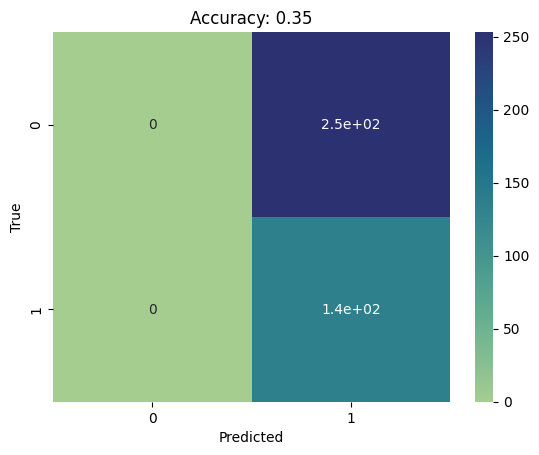

0.35

In [104]:
um.plot_confusion(model, X_train, y_train)

Test loss: 0.694607138633728 / Test accuracy: 0.47826087474823
3/3 [==============================] - 0s 92ms/step


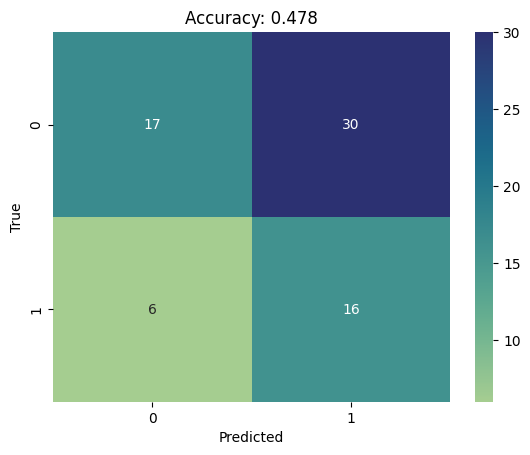

0.478

In [107]:
um.plot_confusion(model, X_test, y_test)

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
score = model.evaluate(X_test, to_categorical(y_test), verbose=0)

In [ ]:
score

---

In [108]:
# FIXED HYPERPARAMETERS
EPOCHS_UNSUPERVISED = 150
HIDDEN_DIM = 512
LATENT_DIMS = [32, 64, 256]
LEARNING_RATE_UNSUPERVISED = 0.001
EPOCHS_SUPERVISED = 100
LEARNING_RATE_SUPERVISED = 0.001

CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"
CNV = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_cnv_data.csv"
EPIGENOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_epigenomic_data.csv"
TRANSCRIPTOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_transcriptomic_data.csv"
IMAGING = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data"

In [116]:
clinical_df = pd.read_csv(CLINICAL)
transcriptomic_df = pd.read_csv(TRANSCRIPTOMIC)
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]
data = transcriptomic_df.merge(diagnosis, on = "case_id").drop_duplicates()
data_training = data[data["case_id"].isin(training_cases)]
data_testing = data[data["case_id"].isin(testing_cases)]
x_train = data_training.loc[:, data.columns != "vital_status_dead"]
x_test = data_testing.loc[:, data.columns != "vital_status_dead"]
y_train = data_training["vital_status_Dead"].astype(int)
y_test = data_testing["vital_status_Dead"].astype(int)

In [123]:
x_train.iloc[:,2:]

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,7.0157,10.7645,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,1.7791,4.4772,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,4.2451,6.9950,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,3.5553,8.0757,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,11.5452,19.1574,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,22.1727,0.0613,26.6510,2.6095,1.1747,4.4012,24.2884,7.3748,9.7017,10.1740,...,0.0,0.0000,0.0152,0.0622,0.0,0.0,0.0,0.0047,0.1885,1
510,17.6945,0.1976,22.4199,0.8574,0.6465,5.0291,3.9113,12.8731,0.6119,11.9758,...,0.0,0.0000,0.0227,0.0000,0.0,0.0,0.0,0.0093,0.0801,1
511,24.3521,0.0098,18.7905,1.9846,1.0234,5.1553,7.5910,30.2022,48.3523,10.0687,...,0.0,0.0000,0.2720,0.0000,0.0,0.0,0.0,0.0135,0.1458,1
513,9.1147,0.0099,16.1424,2.6900,0.6635,5.2058,8.3084,6.7483,1.2258,12.8468,...,0.0,0.0000,0.0692,0.0404,0.0,0.0,0.0,0.0244,0.1659,0


In [115]:
len(training_cases)

389

In [114]:
data_training = data[data["case_id"].isin(training_cases)]

,Unnamed: 0,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,0,TCGA-35-4122,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,0,TCGA-75-6203,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,0,TCGA-75-5146,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,0,TCGA-78-8648,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,0,TCGA-55-A4DG,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,TCGA-86-7714,22.1727,0.0613,26.6510,2.6095,1.1747,4.4012,24.2884,7.3748,...,0.0,0.0000,0.0152,0.0622,0.0,0.0,0.0,0.0047,0.1885,1
510,0,TCGA-64-5775,17.6945,0.1976,22.4199,0.8574,0.6465,5.0291,3.9113,12.8731,...,0.0,0.0000,0.0227,0.0000,0.0,0.0,0.0,0.0093,0.0801,1
511,0,TCGA-05-4418,24.3521,0.0098,18.7905,1.9846,1.0234,5.1553,7.5910,30.2022,...,0.0,0.0000,0.2720,0.0000,0.0,0.0,0.0,0.0135,0.1458,1
513,0,TCGA-55-8097,9.1147,0.0099,16.1424,2.6900,0.6635,5.2058,8.3084,6.7483,...,0.0,0.0000,0.0692,0.0404,0.0,0.0,0.0,0.0244,0.1659,0
